In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib notebook

# Make our plots look nice
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('../Datasets/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Adding fills to line plots

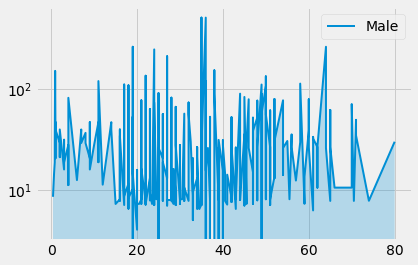

In [3]:
df_male = df[df['Sex'] == 'male'].sort_values(by='Age')

age_male = df_male['Age']
fare_male = df_male['Fare']

plt.plot(age_male, fare_male, label='Male', linewidth=2)

plt.fill_between(age_male, fare_male, alpha=0.25)
plt.yscale('log')

plt.legend()

plt.show()

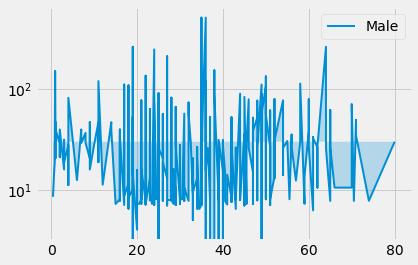

In [4]:
# Fill between two lines
df_male = df[df['Sex'] == 'male'].sort_values(by='Age')

age_male = df_male['Age']
fare_male = df_male['Fare']

plt.plot(age_male, fare_male, label='Male', linewidth=2)

plt.fill_between(age_male, fare_male, 30, alpha=0.25)
plt.yscale('log')

plt.legend()

plt.show()

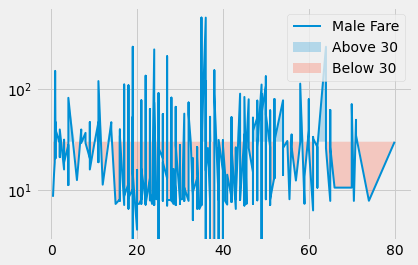

In [5]:
# Fill only when a condition is met
df_male = df[df['Sex'] == 'male'].sort_values(by='Age')

age_male = df_male['Age']
fare_male = df_male['Fare']

plt.plot(age_male, fare_male, label='Male Fare', linewidth=2)

plt.fill_between(age_male, fare_male, 30, where=(fare_male>30), interpolate=True, alpha=0.25, label='Above 30')
plt.fill_between(age_male, fare_male, 30, where=(fare_male<=30), interpolate=True, alpha=0.25, label='Below 30')
plt.yscale('log')

plt.legend()

plt.show()

## Histograms

- Good for visualizing distribution of data, when data falls between certain boundaries.
- Data is divided into bins instead of plotting individual points.
- Count of how many data points fall into bin is plotted.

/Users/ravimashru/scratch/iai-ml-101/venv/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ravimashru/scratch/iai-ml-101/venv/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


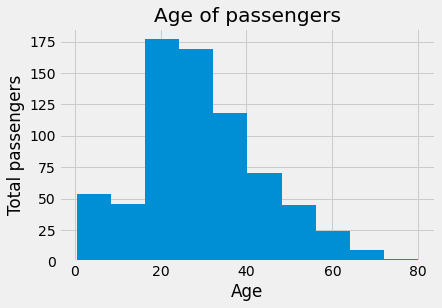

In [6]:
plt.hist(df['Age'])
plt.title('Age of passengers')
plt.xlabel('Age')
plt.ylabel('Total passengers')
plt.show()

Specifying the number of bins: single integer (number of bins)

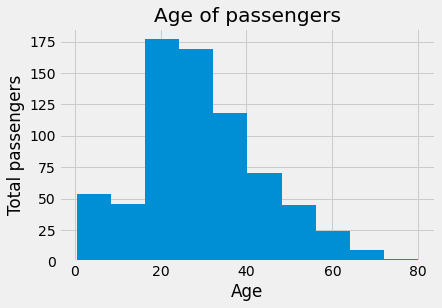

In [7]:
plt.hist(df['Age'], bins=10)
plt.title('Age of passengers')
plt.xlabel('Age')
plt.ylabel('Total passengers')
plt.show()

Make bins clearer by adding an edge color

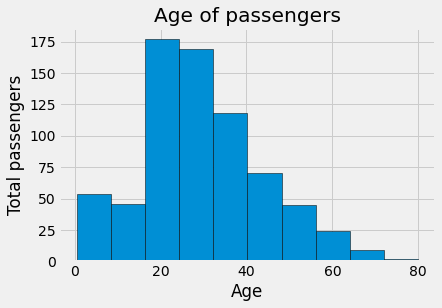

In [8]:
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title('Age of passengers')
plt.xlabel('Age')
plt.ylabel('Total passengers')
plt.show()

Specifying the number of bins: array of bins

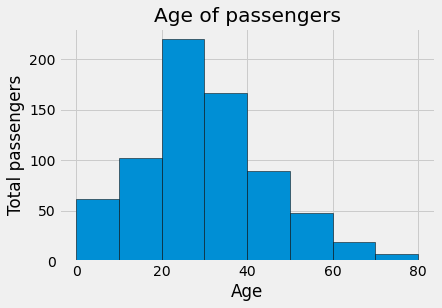

In [9]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# Leave out data points by not including them in the `bins` list.
# For example: if we want to see distribution of ages only until 50.
# bins = [0, 10, 20, 30, 40, 50]

plt.hist(df['Age'], bins=bins, edgecolor='black')
plt.title('Age of passengers')
plt.xlabel('Age')
plt.ylabel('Total passengers')
plt.show()

You can use a log scale to view smaller values better

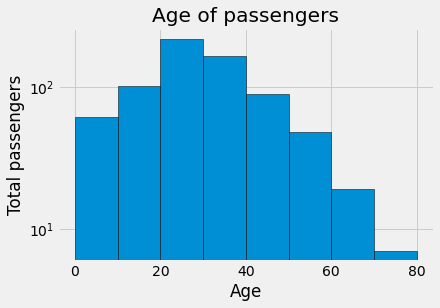

In [10]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
plt.hist(df['Age'], bins=bins, edgecolor='black', log=True)
plt.title('Age of passengers')
plt.xlabel('Age')
plt.ylabel('Total passengers')
plt.show()

Draw a vertical line at the mean and median ages

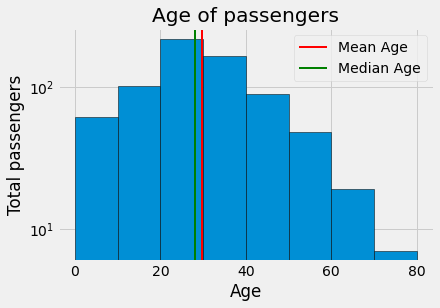

In [11]:
mean = df['Age'].mean()
median = df['Age'].median()
plt.axvline(mean, color='red', label='Mean Age', linewidth=2)
plt.axvline(median, color='green', label='Median Age', linewidth=2)
plt.legend()

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
plt.hist(df['Age'], bins=bins, edgecolor='black', log=True)
plt.title('Age of passengers')
plt.xlabel('Age')
plt.ylabel('Total passengers')
plt.show()

## Scatterplots

- Good for seeing relationship between two sets of values

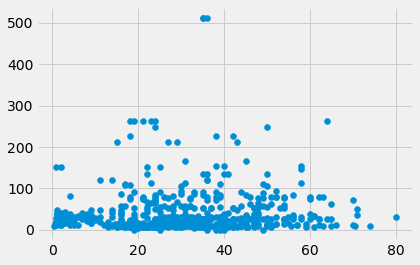

In [12]:
ages = df['Age']
fares = df['Fare']

plt.scatter(ages, fares)
plt.show()

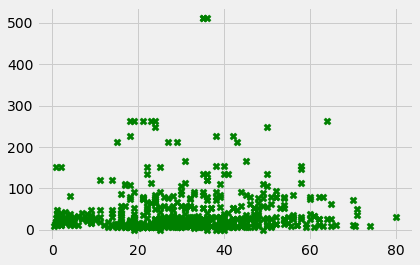

In [13]:
# Change size, color and marker of dots
plt.scatter(ages, fares, s=50, c='green', marker='X')
plt.show()

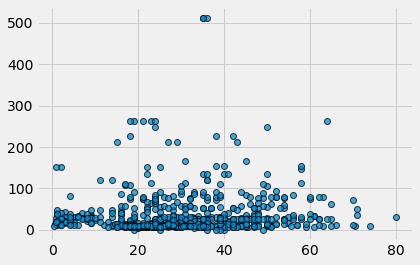

In [14]:
# Add edge color and alpha
plt.scatter(ages, fares, edgecolor='black', linewidth=1, alpha=0.75)
plt.show()

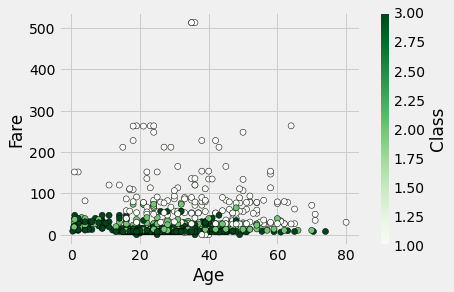

In [15]:
# Different colors for different data points
plt.scatter(ages, fares, c=df['Pclass'].values, cmap='Greens', edgecolor='black')

cbar = plt.colorbar()
cbar.set_label('Class')

plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

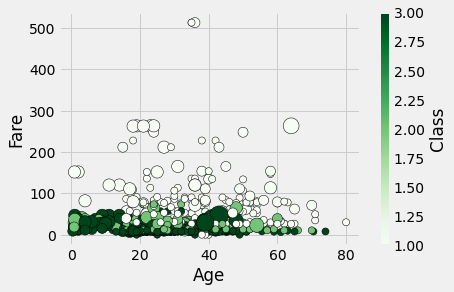

In [16]:
# Different sizes for different data points
plt.scatter(
    ages,
    fares,
    c=df['Pclass'].values,
    cmap='Greens',
    edgecolor='black',
    s=50 + df['Parch'].values*50,
)

cbar = plt.colorbar()
cbar.set_label('Class')

plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

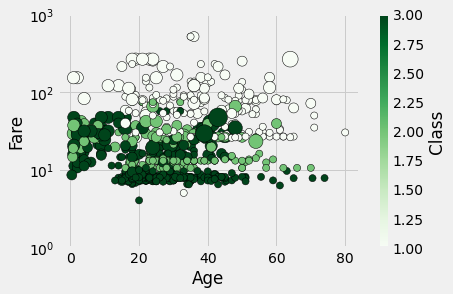

In [17]:
# Use a log scale
plt.scatter(
    ages,
    fares,
    c=df['Pclass'].values,
    cmap='Greens',
    edgecolor='black',
    s=50 + df['Parch'].values*50,
#     alpha=0.7
)
plt.yscale('log')
plt.ylim(bottom=1, top=1e3)

cbar = plt.colorbar()
cbar.set_label('Class')

plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()